**My Data Science Journey**

This will be a 28 day journey where I aim to learn something new each day about classification and regression problems. My goal at the end of it is to place in the top 40% of submissions. Looking at the list of featured competitions (past and present), I have chosen 1 competition from each of the 2 catagories based on my interests. On days my willpower falters, my interest in these topics will hopefully help me remain focussed on my goal. 

* Classification problem:    https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge
* Regression problem:    https://www.kaggle.com/c/elo-merchant-category-recommendation

edit: have not been updating my kernels due to external datascience commitments! The journey is still on, albeit not on Kaggle.

After snooping around on Kaggle for a couple of days, this is what I have gathered so far about core competecies:
1. Data visualisation
    * determine correlation between target and variables
    * analyse distribution of data
2. Data cleaning: 
    * anomalies
    * missing data
    * wrong datatypes
3. Data preparation for model
    * train/test split
    * data transformation: normalisation, standardisation, log-transform
    * noise filtering
    * principal compenent analysis
4. Feature selection / Feature engineering
    * manual feature engineering (domain knowledge)
    * automated feature engineering (brute force)
    * feature importance
    * permutation importanace
    * feature interaction
5. Final model preparation
    * cross validation
    * optimise hyperparameters
    * ensemble methods: stacking, bagging, boosting
    * evaluation metrics

**Why do data visualisation?**

Data visualisation is a method used to summarise our data into informative pictures which helps us make conclusions about our data. 

So why do we want to make conclusions about our data? 

The end goal here is to identify features for our training set which we think will best allow our models do predict accurately. Thus, we need to determine the dependencies between features and target (qualitative) and also to determine the strength of these dependencies (quantitative). This will guide us as we explore our data using visualisations.

**Questions to ask as we go along with data visualisation**:
1. What conclusion can I make from this picture?
2. How will this conclusion affect the quality of my training set? (which will affect the quality of our model)
3. What can do done to solve the problem?


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, StratifiedShuffleSplit, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
import sklearn.ensemble
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


**Part 1: Data Visualistion**

In [2]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Insight**

We see that are some missing values in 'Age'. When there are missing values, we can either drop the column if there are too many missing values or generate values to fill in the blanks. How many missing values are too many? There's no clear answer of course! When in doubt just run two models, with and without the particular feature and then decide. 

Furthermore, we know age will probably be correlated to survival so we keep it in this case.

In [6]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johanson, Mr. Jakob Alfred",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
df_test.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Brandeis, Mr. Emil",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270



We first check the distribution of our target variable.


In [10]:
total = df_train.Survived.count()
survived = df_train.Survived[df_train.Survived == 1].count() / total * 100
non_survived = df_train.Survived[df_train.Survived == 0].count() / total * 100
print('% survivors = ' + str(survived))
print('% non-survivors = ' + str(non_survived))

% survivors = 38.38383838383838
% non-survivors = 61.61616161616161


<BarContainer object of 2 artists>

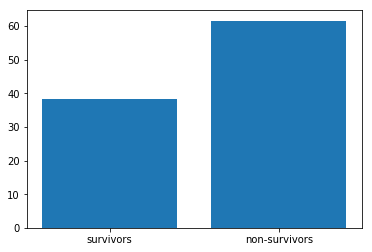

In [11]:
plt.bar( ['survivors', 'non-survivors'], [survived, non_survived])


**Insight from bar chart of target variable**

1. We see here that we are dealing with an imbalanced dataset. 
2. Imbalanced datasets will cause a bias in our model as one class is under-represented by the model.
3. Converting this into a balanced dataset or employing methods to mitigate the effects of an imbalanced dataset will probably improve our predictions.  My plan for now is  keep this at the back of my head and come back to this later when I have finished testing my baseline model. 

In [12]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We then do a univariate analysis of our input variables.

**Discrete variables**
* Nominal variables: Sex, Embarked
* Ordinal: Pclass
* Interval based: SibSp, Parch

**Continuous variables**
* Age
* Fare

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.

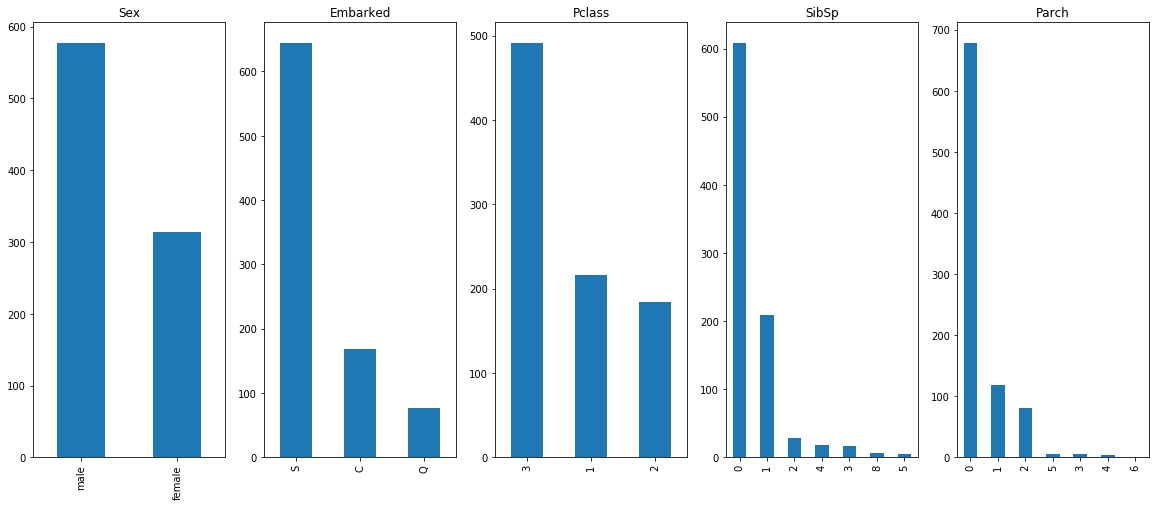

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize = (20,8))
df_train.Sex.value_counts().plot('bar', ax=axes[0], title='Sex')
df_train.Embarked.value_counts().plot('bar', ax=axes[1], title='Embarked')
df_train.Pclass.value_counts().plot('bar', ax=axes[2], title='Pclass')
df_train.SibSp.value_counts().plot('bar', ax=axes[3], title='SibSp')
df_train.Parch.value_counts().plot('bar', ax=axes[4], title='Parch')

**Insights**

1. Majority of people are in Pclass = 3 (3rd class passengers). We also see that majority of people embarked at S. I would start wondering, is there a correlation between the high percentage of people who embarked at port S and the high percentage of 3rd class passengers?

2. Considering bar plots of SibSp and Parch together, majority of passengers traveled alone. One could think that a passenger who traveled alone would be able to quickly attempt to escape once the Titanic struck the iceberg while a passenger traveling with family would have to assist the family in escaping. There is possible a correlation between traveling alone and survival.

3. Sex could also be correlated with survival. During the time period of the Titanic, chivalry probably still existed culturally so women and children would get priority in getting into life boats as passengers evacuated the sinking ship.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


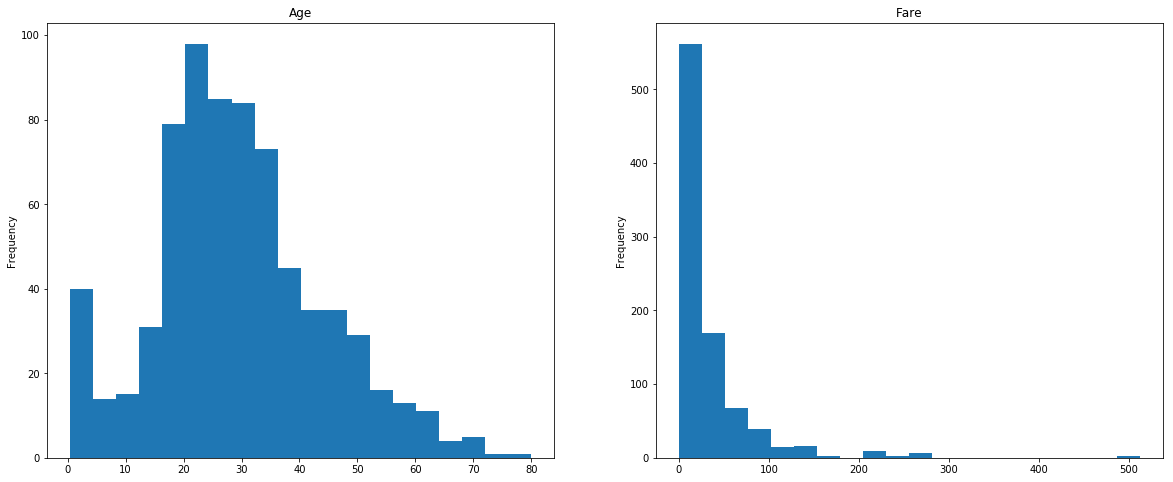

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,8))
df_train.Age.plot('hist', bins=20, ax=axes[0], title='Age')
df_train.Fare.plot('hist', bins=20, ax=axes[1], title='Fare')


**Insights**

1. We see a sharp spike at around age = 2, but there's no cause for alarm as this just means there are quite a few infant passengers. Similar to possible correlation between sex and survival, I would think that here is a correlation between age and survival as infants, elderly and women probably got priority in evacuation.

2. We see the majority of the fare is around the cheaper end, which agrees which the fact that majority of passengers were 3rd class (3rd class tickets are the cheapest of course). 

3. In the histogram for Fares, we see an outlier in the far right end. This really expensive ticket was probably only for a very selective group of individuals. We will decide later whether we will drop this outlier or not.

4. Age histogram follows a weibull distribution somewhat and the Fare historgram follows a lognormal distribution.

Next, we do bivariate analysis.

In [15]:
df_train[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


This shows the conditional probably: given that a passenger is male/female, what is the probably that the passenger survived?

In [16]:
df_train[['Embarked', 'Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


**Insight**

We see that passengers who embarked at port S had the lowest survival rate. I would think if mainly 3rd class passengers embarked at port S as previously hypothesised, then it would make sense that their survival rate is lower compared to higher class passengers as they would have gotten priority in evacuation.

In [17]:
df_train[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


**Insight**

We see a nice direct correlation between survival and passenger class. This would probably be an important feature to prediction survival.

In [18]:
df_train[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values('Survived')

,Survived
SibSp,
5,0.000000
8,0.000000
4,0.166667
3,0.250000
0,0.345395
2,0.464286
1,0.535885


**Insight**

We see that the passengers who had 1 or 2 SibSp had higher survival rate than those who had none and then beyond that the survival rate fall. Let's think about this. 

1. Is it possible that those who had 1 or 2 SibSp would have been able to rely on each other, and through team effort increase their chance for survival? Conversely, those who had no SipSp may have had to struggle for survival alone thus reducing their survival rate.

2. In contrast, with 3 or 4 SipSp we see that their survival rate actually decreased. Is it possible that this is too large a group such that coordination is made more difficult and thus survival rate is reduced?

In [19]:
df_train[['Parch', 'Survived']].groupby('Parch').mean().sort_values('Survived')

,Survived
Parch,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.500000
1,0.550847
3,0.600000


**Insight**

We see that passengers traveling with 3 Parch had the highest survival rate. Adding on to the insights from SibSp vs survival rate, although I hypothesised that traveling in too large a group would decrease survival rate, but there can be an exception in the case of parents and children. 

Let us consider the case of a family with say, a father, a mother and a child. I am inclined to think that the mother and child would have a higher survival rate collectively as they would have gotten priority in evacuation. Well, it is unlikely that a mother and child would be separately evacuated.

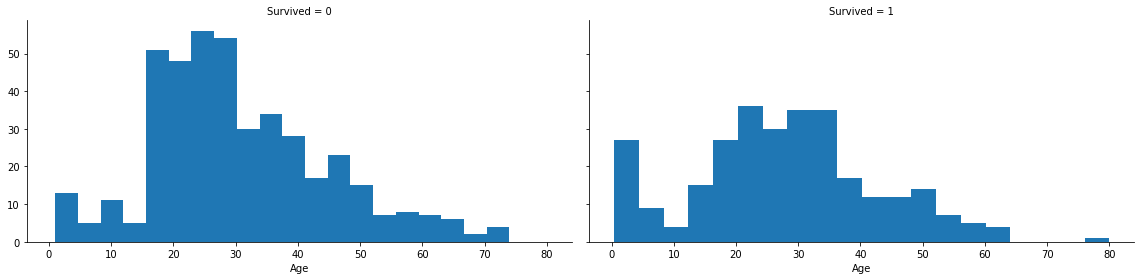

In [20]:
g = sns.FacetGrid(df_train, col="Survived", height=4, aspect=2)
g.map(plt.hist, "Age", bins=20)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Age')

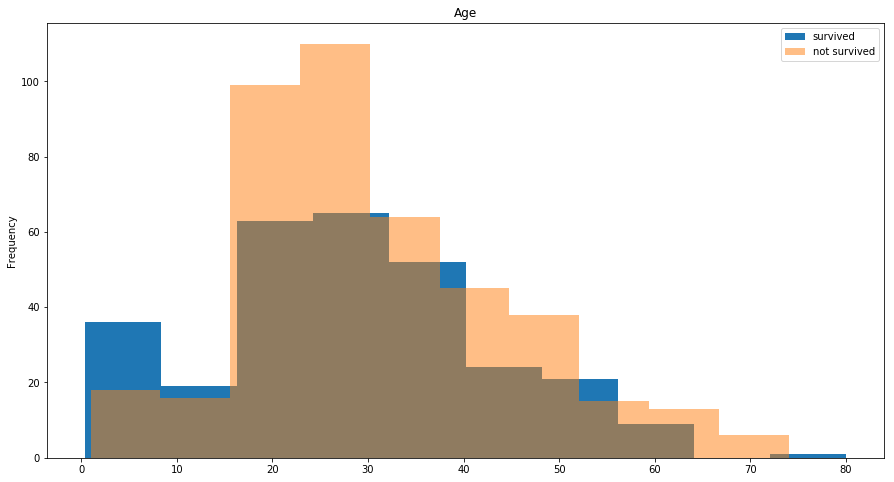

In [21]:
plt.figure(figsize=(15,8))
df_train.Age[df_train.Survived == 1].plot('hist')
df_train.Age[df_train.Survived == 0].plot('hist', alpha=0.5)
plt.legend(['survived', 'not survived'])
plt.title('Age')

From this histogram alone, I can't really extract anything exciting so let's dive in deeper by considering the different categorical varbiales together with age.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """
/opt/conda/lib/python3.6/si

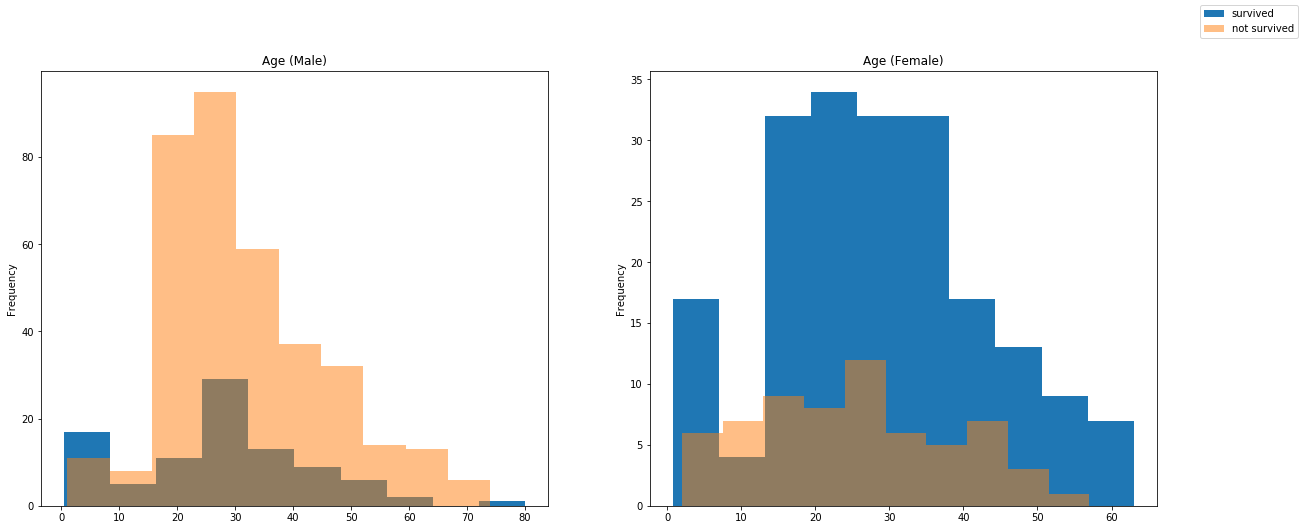

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20,8))
df_train.Age[(df_train.Survived == 1) & (df_train.Sex == 'male')].plot('hist', ax=axes[0])
df_train.Age[(df_train.Survived == 0) & (df_train.Sex == 'male')].plot('hist', ax = axes[0], alpha=0.5, title='Age (Male)')

df_train.Age[(df_train.Survived == 1) & (df_train.Sex == 'female')].plot('hist', ax=axes[1])
df_train.Age[(df_train.Survived == 0) & (df_train.Sex == 'female')].plot('hist', ax = axes[1], alpha=0.5, title='Age (Female)')

fig.legend(['survived', 'not survived'])

Wow! It is not surprising that a significantly larger number of females than males survived across all ages, with the exception of around ages 6~15, which could be an anormaly. But the overal trend for females seems to be that they had higher survival rate than males regardless of age. The converse is true for the survival rates of males. This ties in well with our hypothesis mentioned above.

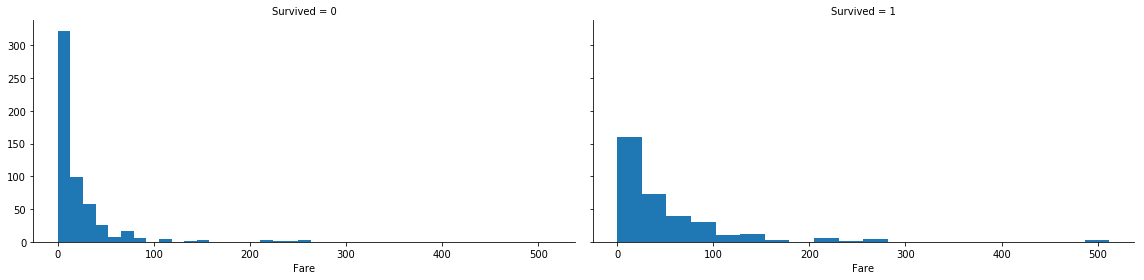

In [23]:
g = sns.FacetGrid(df_train, col="Survived", height=4, aspect=2)
g.map(plt.hist, "Fare", bins=20)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Fare')

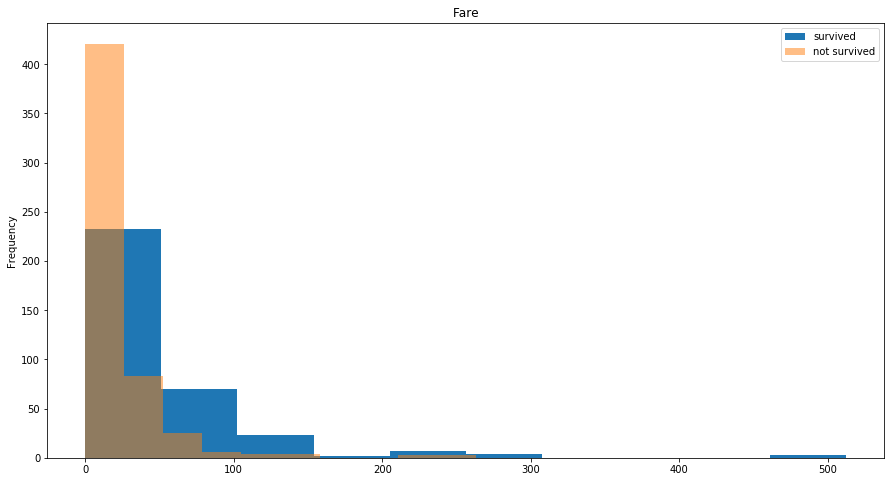

In [24]:
plt.figure(figsize=(15,8))
df_train.Fare[df_train.Survived == 1].plot('hist')
df_train.Fare[df_train.Survived == 0].plot('hist', alpha=0.5)
plt.legend(['survived', 'not survived'])
plt.title('Fare')


We see that higher paying passengers had higher survival. Let's break it down further according to Pclass.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """
/opt/conda/lib/python3.6/si

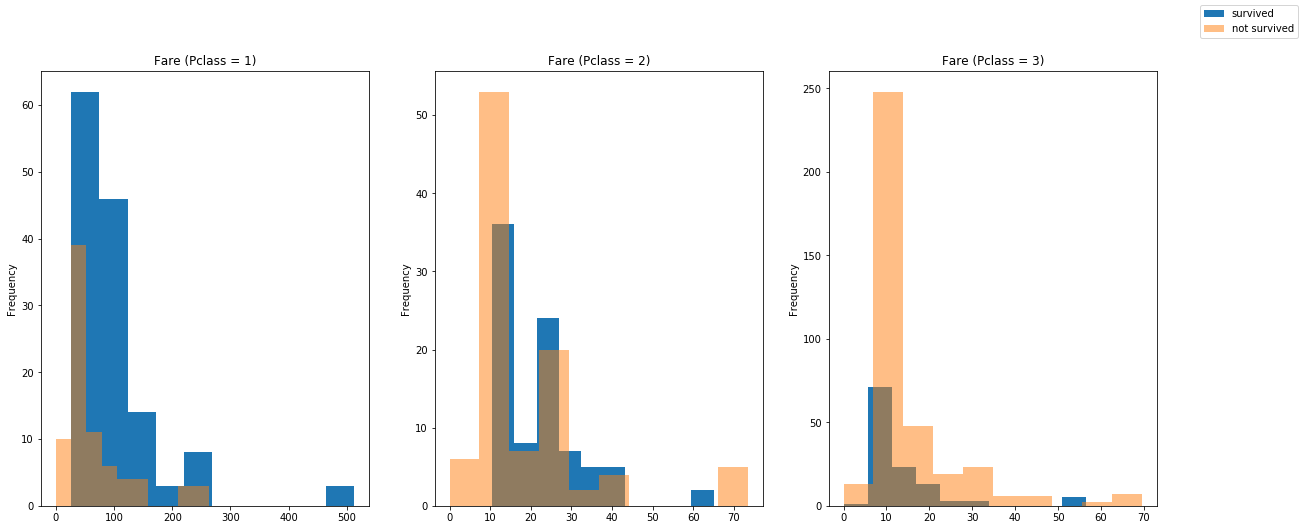

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,8))
df_train.Fare[(df_train.Survived == 1) & (df_train.Pclass == 1)].plot('hist', ax=axes[0])
df_train.Fare[(df_train.Survived == 0) & (df_train.Pclass == 1)].plot('hist', ax = axes[0], alpha=0.5, title='Fare (Pclass = 1)')

df_train.Fare[(df_train.Survived == 1) & (df_train.Pclass == 2)].plot('hist', ax=axes[1])
df_train.Fare[(df_train.Survived == 0) & (df_train.Pclass == 2)].plot('hist', ax = axes[1], alpha=0.5, title='Fare (Pclass = 2)')

df_train.Fare[(df_train.Survived == 1) & (df_train.Pclass == 3)].plot('hist', ax=axes[2])
df_train.Fare[(df_train.Survived == 0) & (df_train.Pclass == 3)].plot('hist', ax = axes[2], alpha=0.5, title='Fare (Pclass = 3)')

fig.legend(['survived', 'not survived'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """
/opt/conda/lib/python3.6/site-pac

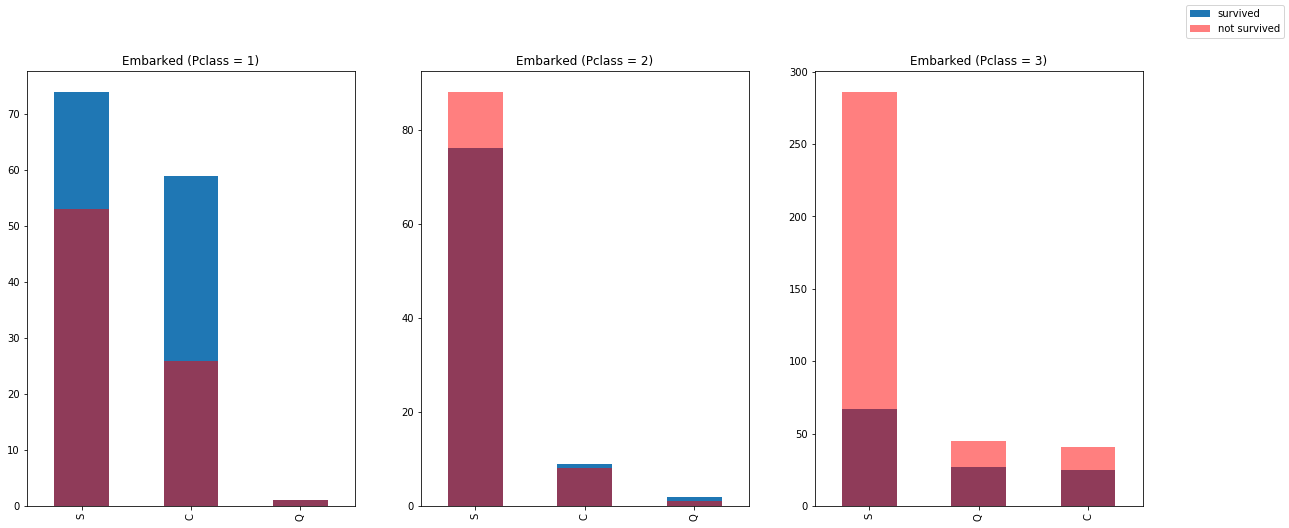

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20,8))
df_train.Embarked[(df_train.Survived == 1) & (df_train.Pclass == 1)].value_counts().plot('bar', ax=axes[0])
df_train.Embarked[(df_train.Survived == 0) & (df_train.Pclass == 1)].value_counts().plot('bar', ax = axes[0], color='r', alpha=0.5, title='Embarked (Pclass = 1)')

df_train.Embarked[(df_train.Survived == 1) & (df_train.Pclass == 2)].value_counts().plot('bar', ax=axes[1])
df_train.Embarked[(df_train.Survived == 0) & (df_train.Pclass == 2)].value_counts().plot('bar', ax = axes[1], color='r', alpha=0.5, title='Embarked (Pclass = 2)')

df_train.Embarked[(df_train.Survived == 1) & (df_train.Pclass == 3)].value_counts().plot('bar', ax=axes[2])
df_train.Embarked[(df_train.Survived == 0) & (df_train.Pclass == 3)].value_counts().plot('bar', ax = axes[2], color='r', alpha=0.5, title='Embarked (Pclass = 3)')

fig.legend(['survived', 'not survived'])

**Insight**

Our initial hypothesis that port S could be the port where 3rd class passengers mainly board at runs contrary to what is shown here. We see that in all classes, port S is the most popular so it is unlikely that port S is mainly populated by passengers of a certain class. Port S could just be popular due to its geographic reasons and in fact port may not be that important a feature in predicting survival. We will check it out after we build our baseline model.

In [27]:
df_train.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

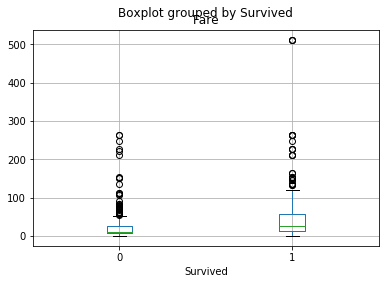

In [28]:
df_train.boxplot(by='Survived', column = ['Fare'])


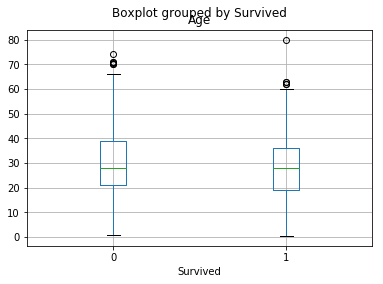

In [29]:
df_train.boxplot(by='Survived', column = ['Age'])

These two boxplots show that there is quite a significant number of outliers in our data when we compare 'Fare' with survival. We certainly do not want to discard all these outliers as this will result in sigificant information loss. When deploy our models, I would think that a model that is more robust to outliers will perform better. We will check this later on.

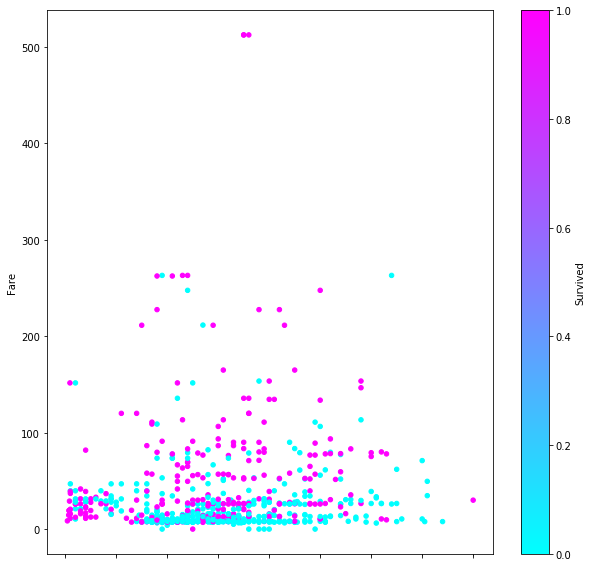

In [30]:
df_train.plot.scatter(x = 'Age', y = 'Fare', c='Survived', colormap = 'cool', figsize=(10,10))

Somehow my x label (Age) is not appearing...

Personally, I am not well-versed with interpreting scatterplots so in this case here, I wonder what insights could be derived...

Can anyone reading this provide some clues or resources that might help me? 

**Conclusion for Part 1: Data Visualisation**

1. Exploring numerical statistics from dataset by .describe() and .info()
2. Univariate analysis; forming some inital hypotheses.
3. Bivariate analysis; conditional probability to probe at underlying relationships and confirming some of the inital hypotheses.
4. Exploring higher order relationshis to possibly gain more in-depth insights?

All in all, we explore the dataset using data visualisation to gain a feel for what features will likely be more important for use in our model later on.

**Part 2: Data Cleaning**

Things to look out for:

1. Anomalies
2. Missing values
3. Zero values (is the value really zero or is zero the dafault entry in the event of an info gap)
4. Incorrect datatypes



In [31]:
df_train[df_train.Pclass == 1].sort_values('Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,NaN,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


**Insight**

We see that there are some case where Fare is 0. Could the passengers have gotten a free ride onto the Titanic? Possible as these group of people could be the employees (cabin crew, service staff, etc).

A significant amount of 'age' data is missing in both the test and training dataset. We need to decide how we will deal with this.

We have a strong feel that age will be an important feature in predicting survival so we prioritise filling in the missing values as opposed to dropping the rows with missing 'age' data.

**Missing Values**

1. training set: Age
2. training set: Embarked
3. test set: Age
4. test set: Fare


For categaorical variable 'Embarked', we will correct for missing value by using the most frequent value.

In [32]:
df_train.Embarked = df_train.Embarked.fillna(df_train.Embarked.value_counts().index[0])

For 'Age' and 'Fare', we will randomly sample values from the current distribution of values so that we can retain the overall distribution even after filling in the missing values. 

In [33]:
missing_age = df_train.Age.isnull()
sample = df_train.Age.dropna().sample(missing_age.sum(), replace=True).values
df_train.loc[missing_age, 'Age'] = sample

In [34]:
missing_age2 = df_test.Age.isnull()
sample = df_test.Age.dropna().sample(missing_age2.sum(), replace=True).values
df_test.loc[missing_age2, 'Age'] = sample

In [35]:
missing_fare = df_test.Fare.isnull()
sample = df_test.Fare.dropna().sample(missing_fare.sum(), replace=True).values
df_test.loc[missing_fare, 'Fare'] = sample

When using preprocessing methods, the general consensus is to fit the methods to the train set and apply it on the test set to prevent data leakage. In this case, I would think it is more reasonable to go against the general consensus and actually fill in the missing values in the test set from random samples within the test set itself. 

In actual fact, I would think that the following two ways would result in a similar end product:

1. Fill missing values in test set by random samples from train set.
2. Fill missing values in test set by random samples from test set itself.

This is because the data in train set and test set would have come from a similar distribution before being split and provided to us by Kaggle. We check this by plotting the distribution now.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',

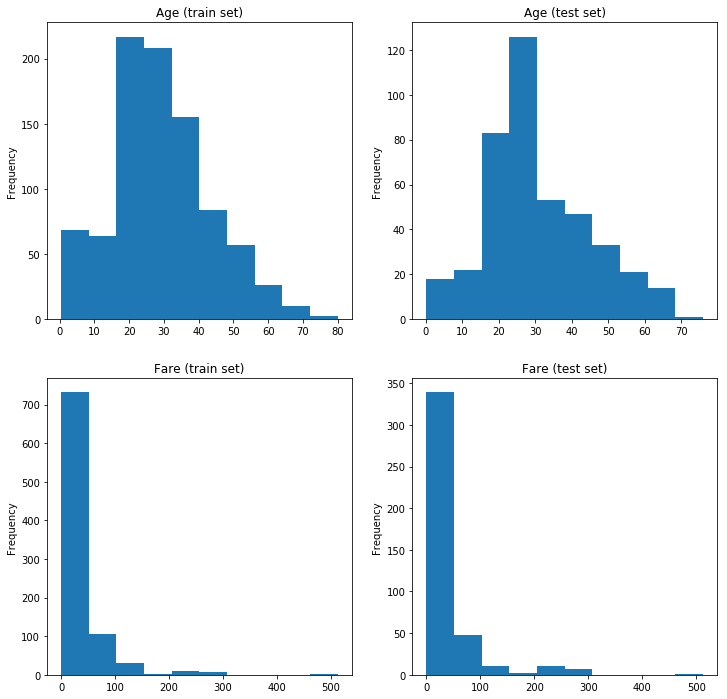

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12,12))

df_train.Age.plot('hist', ax=axes[0,0], title='Age (train set)')
df_test.Age.plot('hist', ax=axes[0,1], title='Age (test set)')

df_train.Fare.plot('hist', ax=axes[1,0], title='Fare (train set)')
df_test.Fare.plot('hist', ax=axes[1,1], title='Fare (test set)')

**Part 3: Data Preparation for Model**

We will do the following:

1. Apply some form of power transformation to 'Age' and 'Fare' to check if we are able to get a normal distribution.
2. Split 'Age' and 'Fare' into bins.
4. Convert categorical string variables into numerical variables.
5. Deploy baseline model.

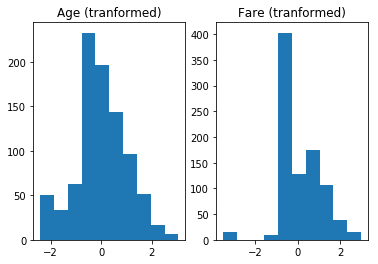

In [37]:
xform_age = sklearn.preprocessing.PowerTransformer(method='box-cox').fit(np.asarray(df_train.Age).reshape(len(df_train.Age),1))
xform_fare = sklearn.preprocessing.PowerTransformer(method='box-cox').fit(np.asarray(df_train.Fare + 1).reshape(len(df_train.Fare),1))

age_T = xform_age.transform(np.asarray(df_train.Age).reshape(len(df_train.Age),1))
fare_T = xform_fare.transform(np.asarray(df_train.Fare + 1).reshape(len(df_train.Fare),1))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.hist(age_T)
ax1.title.set_text('Age (tranformed)')
ax2.hist(fare_T)
ax2.title.set_text('Fare (tranformed)')

We managed to remove some skewness!


We added a constant of + 1 to all values in 'Fare' because the box-cox transform does not deal well with the values of 0.

The next step would be to determine the bin size. I am disinclined to use fix bin widths for either distribution. The reason for this is because there are regions where the data is densely populated and some regions that are sparsely populated. We can attempt adaptive binning based on quantiles.

In [38]:
age_T = pd.DataFrame(age_T)
age_T.columns = ['Age']
quantile_age = xform_age.transform(np.asarray([0.1, 12, 20, 40, 80]).reshape(-1,1))
quantile_age = quantile_age.reshape(-1)
age_T['Quantile'] = pd.cut(age_T.Age, bins=quantile_age, labels = False, retbins=False)

fare_T = pd.DataFrame(fare_T)
fare_T.columns = ['Fare']
quantile_fare = xform_fare.transform(np.asarray([1, 32, 100, 350, 601]).reshape(-1,1))
quantile_fare = quantile_fare.reshape(-1)
fare_T['Quantile'] = pd.cut(fare_T.Fare, bins=quantile_fare, labels = False, retbins=False)


(array([ 92.,   0.,   0., 134.,   0.,   0., 486.,   0.,   0., 179.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

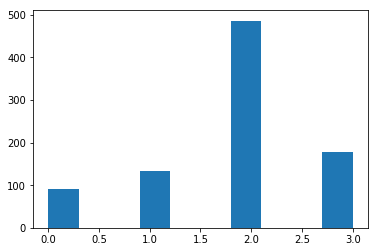

In [39]:
plt.hist(age_T.Quantile)

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([654.,   0.,   0., 169.,   0.,   0.,  50.,   0.,   0.,   3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

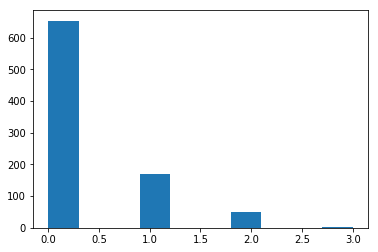

In [40]:
plt.hist(fare_T.Quantile)

Now that we have seen how this works, the code can be truncated and made more efficient by using sklearn's KBinsDiscretizer which does the binning and conversion of a continuous variable into a categorical varaible.

In [41]:
age_T.head()

,Age,Quantile
0,-0.460178,2
1,0.622983,2
2,-0.176218,2
3,0.429353,2
4,0.429353,2


In [42]:
df_train.Age = age_T.Age
df_train.Fare = fare_T.Fare

In [43]:
train_age_arr = np.asarray(df_train.Age).reshape(len(df_train.Age),1)
train_fare_arr = np.asarray(df_train.Fare).reshape(len(df_train.Fare),1)

age_binner = sklearn.preprocessing.KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile').fit(train_age_arr)
binned_age = age_binner.transform(train_age_arr)

fare_binner = sklearn.preprocessing.KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile').fit(train_fare_arr)
binned_fare = age_binner.transform(train_fare_arr)

(array([208.,   0.,   0., 216.,   0.,   0., 233.,   0.,   0., 234.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

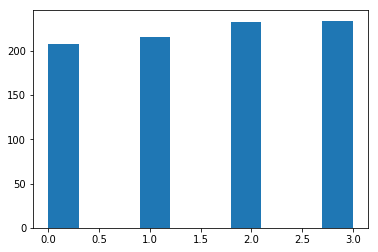

In [44]:
plt.hist(binned_age)

(array([329.,   0.,   0., 167.,   0.,   0., 189.,   0.,   0., 206.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

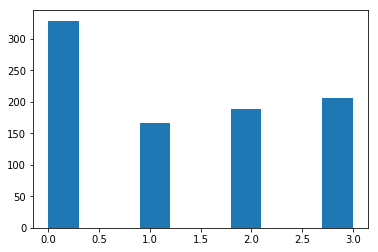

In [45]:
plt.hist(binned_fare)

After using quantile based binning, we expect there to be a similar number of observations in each bin as demonstrated when we implemented the binning manually. 

This is not the case as observed here. I am unsure what went wrong with my implementation of the KBinsDiscretizer...

We now prepare the input features for our baseline model.

A quick look at what we have so far.

In [46]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.460178,1,0,A/5 21171,-0.878820,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.622983,1,0,PC 17599,1.336651,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.176218,0,0,STON/O2. 3101282,-0.790065,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.429353,1,0,113803,1.067352,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.429353,0,0,373450,-0.774439,NaN,S


In [47]:
input_train = df_train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])
input_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.460178,1,0,-0.878820,S
1,1,1,female,0.622983,1,0,1.336651,C
2,1,3,female,-0.176218,0,0,-0.790065,S
3,1,1,female,0.429353,1,0,1.067352,S
4,0,3,male,0.429353,0,0,-0.774439,S


In [48]:
encoder_sex = sklearn.preprocessing.LabelEncoder().fit(input_train.Sex.to_numpy().reshape(len(input_train),1))
sex_encoded = encoder_sex.transform(input_train.Sex.to_numpy().reshape(len(input_train),1))
print(sex_encoded[0:5])


[1 0 0 0 1]


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
encoder_embark = sklearn.preprocessing.OneHotEncoder().fit(input_train.Embarked.to_numpy().reshape(len(input_train),1))
embarked_encoded = encoder_embark.transform(input_train.Embarked.to_numpy().reshape(len(input_train),1)).toarray()
print(encoder_embark.categories_)
print(embarked_encoded[0:5])
encoder_embark.get_feature_names(['Port'])

[array(['C', 'Q', 'S'], dtype=object)]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


array(['Port_C', 'Port_Q', 'Port_S'], dtype=object)

In [50]:
input_Port = pd.DataFrame(embarked_encoded)
input_Port.columns = encoder_embark.get_feature_names(['Port'])

In [51]:
input_Sex = pd.DataFrame(sex_encoded)
input_Sex.columns = ['Sex']


In [52]:
missing_fare = fare_T.Quantile[fare_T.Quantile.isnull()]

In [53]:
fare_T.iloc[missing_fare.index, :]

,Fare,Quantile
179,-3.534079,NaN
263,-3.534079,NaN
271,-3.534079,NaN
277,-3.534079,NaN
302,-3.534079,NaN
413,-3.534079,NaN
466,-3.534079,NaN
481,-3.534079,NaN
597,-3.534079,NaN
633,-3.534079,NaN


In [54]:
fare_T.fillna(0, inplace=True)

In [55]:
fare_T.isnull().sum()

Fare        0
Quantile    0
dtype: int64

In [56]:
input_train.Sex = input_Sex

input_train = input_train.drop(columns=['Embarked'])
input_train[list(encoder_embark.get_feature_names(['Port']))] = input_Port

input_train.Age = age_T.Quantile
input_train.Fare = fare_T.Quantile

input_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Port_C,Port_Q,Port_S
0,0,3,1,2,1,0,0.0,0.0,0.0,1.0
1,1,1,0,2,1,0,1.0,1.0,0.0,0.0
2,1,3,0,2,0,0,0.0,0.0,0.0,1.0
3,1,1,0,2,1,0,1.0,0.0,0.0,1.0
4,0,3,1,2,0,0,0.0,0.0,0.0,1.0


In [57]:
input_test = df_test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])

sex_encoded_test = encoder_sex.transform(input_test.Sex.to_numpy().reshape(len(input_test),1))
embarked_encoded_test = encoder_embark.transform(input_test.Embarked.to_numpy().reshape(len(input_test),1)).toarray()

input_Sex_test = pd.DataFrame(sex_encoded_test)
input_Sex_test.columns = ['Sex']
input_Port_test = pd.DataFrame(embarked_encoded_test)

input_test.Sex = input_Sex_test

input_test = input_test.drop(columns=['Embarked'])
input_test[list(encoder_embark.get_feature_names(['Port']))] = input_Port_test

input_age_T = xform_age.transform(input_test.Age.to_numpy().reshape(len(input_test.Age),1))
input_fare_T = xform_fare.transform((input_test.Fare + 1).to_numpy().reshape(len(input_test.Fare),1))

binned_age_T = pd.cut(input_age_T.reshape(len(input_age_T),), bins=quantile_age, labels=[0,1,2,3])  
binned_fare_T = pd.cut(input_fare_T.reshape(len(input_fare_T),), bins=quantile_fare, labels=[0,1,2,3])                                
                                    
input_test.Age = pd.DataFrame(binned_age_T).iloc[:,0]
input_test.Fare = pd.DataFrame(binned_fare_T).iloc[:,0]

input_test.head()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Pclass,Sex,Age,SibSp,Parch,Fare,Port_C,Port_Q,Port_S
0,3,1,2,0,0,0.0,0.0,1.0,0.0
1,3,0,3,1,0,0.0,0.0,0.0,1.0
2,2,1,3,0,0,0.0,0.0,1.0,0.0
3,3,1,2,0,0,0.0,0.0,0.0,1.0
4,3,0,2,1,1,0.0,0.0,0.0,1.0


We check if our binning process was successful

In [58]:
idx_age = input_test.Age[input_test.Age.isnull()].index


In [59]:
idx_fare = input_test.Fare[input_test.Fare.isnull()].index

These transformed values are probably out of range of the bins used to fit the train set. We will manually consider these cases and correct them.

In [60]:
quantile_age

array([-2.4870534 , -1.23067409, -0.60648611,  0.75014049,  3.06917982])

In [61]:
quantile_fare

array([-3.53407923,  0.55945838,  1.62938453,  2.67599234,  3.08955172])

In [62]:
for i in range(len(idx_age)):
    if binned_age_T[idx_age[i]] <= quantile_age[0]:
        input_test.Age[idx_age[i]] = 0
    else: 
        input_test.Age[idx_age[i]] = 3

for i in range(len(idx_fare)):
    if binned_fare_T[idx_fare[i]] <= quantile_fare[0]:
        input_test.Fare[idx_fare[i]] = 0
    else: 
        input_test.Fare[idx_fare[i]] = 3

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [63]:
input_train = input_train.astype(int)
input_test = input_test.astype(int)

Now we can try some baseline models! We start with logistic regression.

In [64]:
X = input_train.drop(columns=['Survived'])
y = input_train.Survived

In [65]:
logR = LogisticRegression()
logR.fit(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
score_logR = logR.score(X,y)
print('LogR score is ' + str(score_logR))

LogR score is 0.8058361391694725


In [67]:
logR_coef

NameError: name 'logR_coef' is not defined

In [68]:
input_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Port_C,Port_Q,Port_S
0,3,1,2,0,0,0,0,1,0
1,3,0,3,1,0,0,0,0,1
2,2,1,3,0,0,0,0,1,0
3,3,1,2,0,0,0,0,0,1
4,3,0,2,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,1,1,0,0,0,0,0,1
414,1,0,2,0,0,2,1,0,0
415,3,1,2,0,0,0,0,0,1
416,3,1,2,0,0,0,0,0,1


In [69]:
logR_coef = pd.DataFrame(logR.coef_.transpose())
logR_coef.columns = ['weights']
logR_coef.insert(0, 'feature', input_test.columns.values)
logR_coef.sort_values('weights')

,feature,weights
1,Sex,-2.565648
0,Pclass,-0.853862
2,Age,-0.473195
3,SibSp,-0.316555
4,Parch,-0.099035
5,Fare,0.244127
8,Port_S,0.814102
7,Port_Q,1.038157
6,Port_C,1.225986


Looking at the magnitude of the weights, it seems that SibSp, Age and Parch seem to have a low impact on predicting survival. We shall do feature engineering later on to improve on this.

In [70]:
logR_pred = logR.predict(input_test)

In [71]:
submit = pd.DataFrame(logR_pred)
submit.columns = ['Survived']

submit.insert(0, 'PassengerId', df_test.PassengerId.values)

In [72]:
submit.to_csv('logR_baseline.csv', index = False)

Next, we try support vector classification.

In [73]:
svc = SVC()
svc.fit(X,y)


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [74]:
score_svc = svc.score(X,y)
print('SVC score is ' + str(score_svc))

SVC score is 0.8316498316498316


In [75]:
svc_pred = svc.predict(input_test)
submit = pd.DataFrame(svc_pred)
submit.columns = ['Survived']
submit.insert(0, 'PassengerId', df_test.PassengerId.values)
submit.to_csv('svc_baseline.csv', index = False)

We try decision tree next.

In [76]:
tree = DecisionTreeClassifier()
tree.fit(X,y)
print(tree)
score_tree = tree.score(X,y)
print('Decision tree score is ' + str(score_tree))

tree_pred = tree.predict(input_test)
submit = pd.DataFrame(tree_pred)
submit.columns = ['Survived']
submit.insert(0, 'PassengerId', df_test.PassengerId.values)
submit.to_csv('tree_baseline.csv', index = False)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Decision tree score is 0.8787878787878788


Next, we try k-nearest neighbours.

In [77]:
knn = KNeighborsClassifier()
knn.fit(X,y)
print(knn)
score_knn = knn.score(X,y)
print('KNN score is ' + str(score_knn))

knn_pred = knn.predict(input_test)
submit = pd.DataFrame(knn_pred)
submit.columns = ['Survived']
submit.insert(0, 'PassengerId', df_test.PassengerId.values)
submit.to_csv('knn_baseline.csv', index = False)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
KNN score is 0.8507295173961841


Lastly, we try MLPClassifier.

In [78]:
mlp = MLPClassifier()
mlp.fit(X,y)
print(mlp)
score_mlp = mlp.score(X,y)
print('MLP score is ' + str(score_mlp))

mlp_pred = mlp.predict(input_test)
submit = pd.DataFrame(knn_pred)
submit.columns = ['Survived']
submit.insert(0, 'PassengerId', df_test.PassengerId.values)
submit.to_csv('mlp_baseline.csv', index = False)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
MLP score is 0.8451178451178452


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [79]:
summary = pd.DataFrame([score_logR, score_svc, score_tree, score_knn, score_mlp])
summary.columns = ['self score']
baseline = ['logR', 'SVC', 'DecisionT', 'KNN', 'MLP']

summary.insert(0, 'baseline model', baseline)
summary.head()

,baseline model,self score
0,logR,0.805836
1,SVC,0.831650
2,DecisionT,0.878788
3,KNN,0.850730
4,MLP,0.845118


From here, we will do feature engineering followed by optimsation of hyper-parameters of our baseline model and lastly try out some ensemble methods. 

Note that the aim is to improve from our baseline model but not the point where we are overfitting our model to the training data. This is really just one huge optimsation problem were we consider the tradeoff between our model's ability to generalise to unseen data and the amount of overfitting to training data.

**Part 4: Feature Engineering**

What we have so far,

In [80]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Port_C,Port_Q,Port_S
0,3,1,2,1,0,0,0,0,1
1,1,0,2,1,0,1,1,0,0
2,3,0,2,0,0,0,0,0,1
3,1,0,2,1,0,1,0,0,1
4,3,1,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,1,2,0,0,0,0,0,1
887,1,0,1,0,0,0,0,0,1
888,3,0,2,1,2,0,0,0,1
889,1,1,2,0,0,0,1,0,0


In [81]:
def feature_weights(model):
    try: 
        weight = model.coef_
    except AttributeError:
        weight = model.feature_importances_
    finally:
        df_weight = pd.DataFrame(weight.transpose())
        df_weight.columns = ['weights']
        df_weight.insert(0, 'feature', input_test.columns.values)
    return df_weight.sort_values('weights')

In [82]:
logR_coef = feature_weights(logR)
logR_coef

,feature,weights
1,Sex,-2.565648
0,Pclass,-0.853862
2,Age,-0.473195
3,SibSp,-0.316555
4,Parch,-0.099035
5,Fare,0.244127
8,Port_S,0.814102
7,Port_Q,1.038157
6,Port_C,1.225986


In [83]:
tree_coef = feature_weights(tree)
tree_coef

,feature,weights
7,Port_Q,0.007043
6,Port_C,0.016660
8,Port_S,0.036949
5,Fare,0.043006
3,SibSp,0.076931
4,Parch,0.085282
2,Age,0.106345
0,Pclass,0.168611
1,Sex,0.459174


Support vector classification, k-nearest neighbours and multi layer perceptron algorithms have no feature importance attribute.

From the feature importance of the decision tree model, we see that the feature relating to Ports (Q/C/S) are low individually. This is because of dummy variables created when we used one-hot encoding. We actually have to consider all 3 together for this feature to make sense.

We try combining SibSp and Parch.

In [84]:
X['Family'] = X.SibSp + X.Parch
X.drop(columns=['SibSp', 'Parch'], inplace=True)


In [85]:
input_test['Family'] = input_test.SibSp + input_test.Parch
input_test.drop(columns=['SibSp', 'Parch'], inplace=True)

In [86]:
X

,Pclass,Sex,Age,Fare,Port_C,Port_Q,Port_S,Family
0,3,1,2,0,0,0,1,1
1,1,0,2,1,1,0,0,1
2,3,0,2,0,0,0,1,0
3,1,0,2,1,0,0,1,1
4,3,1,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...
886,2,1,2,0,0,0,1,0
887,1,0,1,0,0,0,1,0
888,3,0,2,0,0,0,1,3
889,1,1,2,0,1,0,0,0


Since some of the algorithms have no feature importance API available, we can try the following method to see the effect of a feature on the model's predicitive power.

In [87]:
def all_but_one(estimators, X, y, estimator_names):
    score= []
    for i in range(len(estimators)):
        score_all = []
        model = estimators[i].fit(X,y)
        score_base = model.score(X,y)
        col_nam = X.columns.values
        score_all.append(score_base)

        for col in range(len(col_nam)):
            X_remain = X.drop(columns=[col_nam[col]])
            model_remain = estimators[i].fit(X_remain, y)
            score_remain = model_remain.score(X_remain, y)
            score_all.append(score_remain)
        score.append(score_all)
    score = pd.DataFrame(np.asarray(score).transpose())
    col_nam = list('w/o ' + col_nam)
    col_nam.insert(0, 'baseline')
    score.columns = list('self score ' + np.asarray(estimator_names, dtype=object))
    score.insert(0, 'feature', col_nam)
    return score

In [88]:
feature_importances = all_but_one([logR, svc, tree, knn, mlp], X.drop(columns=['Port_C','Port_Q','Port_S']), y, ['logR', 'SVC', 'DecisionT', 'KNN', 'MLP'])
feature_importances

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

,feature,self score logR,self score SVC,self score DecisionT,self score KNN,self score MLP
0,baseline,0.803591,0.828283,0.850730,0.837262,0.830527
1,w/o Pclass,0.792368,0.827160,0.839506,0.823793,0.821549
2,w/o Sex,0.698092,0.737374,0.755331,0.699214,0.739618
3,w/o Age,0.804714,0.812570,0.823793,0.814815,0.811448
4,w/o Fare,0.804714,0.830527,0.843996,0.823793,0.831650
5,w/o Family,0.791246,0.814815,0.817059,0.805836,0.814815


We see that the baseline model has a higher score throughout. This means that we cannot drop any of the current features as they contain information about our target.

Intuitively, we would think Pclass and Fare would be correlated as tickets for a higher class would have a higher fare. We create a simple interaction term between the 2 as a new feature to see if this gives us more information about whether a passenger survives or not.

In [89]:
polyfeat = sklearn.preprocessing.PolynomialFeatures(include_bias=False, interaction_only=True)
interact = polyfeat.fit_transform(X.loc[:,['Pclass', 'Fare']])[:,1]
interact = interact.astype('int')

In [90]:
X

,Pclass,Sex,Age,Fare,Port_C,Port_Q,Port_S,Family
0,3,1,2,0,0,0,1,1
1,1,0,2,1,1,0,0,1
2,3,0,2,0,0,0,1,0
3,1,0,2,1,0,0,1,1
4,3,1,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...
886,2,1,2,0,0,0,1,0
887,1,0,1,0,0,0,1,0
888,3,0,2,0,0,0,1,3
889,1,1,2,0,1,0,0,0


In [91]:
X_new = X.drop(columns=['Port_C','Port_Q','Port_S']).copy()
X_new.drop(columns=['Pclass', 'Fare'], inplace=True)
X_new.insert(1, 'Pclass_Fare', interact)
X_new

,Sex,Pclass_Fare,Age,Family
0,1,0,2,1
1,0,1,2,1
2,0,0,2,0
3,0,1,2,1
4,1,0,2,0
...,...,...,...,...
886,1,0,2,0
887,0,0,1,0
888,0,0,2,3
889,1,0,2,0


In [92]:
feature_importances2 = all_but_one([logR, svc, tree, knn, mlp], X_new, y, ['logR', 'SVC', 'DecisionT', 'KNN', 'MLP'])
feature_importances2

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

,feature,self score logR,self score SVC,self score DecisionT,self score KNN,self score MLP
0,baseline,0.792368,0.827160,0.839506,0.822671,0.824916
1,w/o Sex,0.664422,0.713805,0.739618,0.708193,0.728395
2,w/o Pclass_Fare,0.793490,0.822671,0.829405,0.815937,0.824916
3,w/o Age,0.792368,0.811448,0.814815,0.804714,0.804714
4,w/o Family,0.791246,0.786756,0.793490,0.728395,0.791246


We see that only the baseline score of Decision Tree model is decreased, the other models remain approximately unaffected. In this case, our new feature did not give us more information about the target. Hence, we drop the new feature.

**Part 5: Final Model Preparation**

1. We first perform cross validation and hyper-parameter optimsation for the models.
2. Select the best 3 to create an ensemble.

In [93]:
param_logR = {'penalty' : ['l1', 'l2'], 'tol' : [1e-3, 1e-4, 1e-5], 
              'C' : [0.3, 0.6, 1]}
param_svc = {'kernel' : ['rbf', 'linear', 'poly'], 'gamma' : ['auto', 'scale'],
             'C' : [0.3, 0.6, 1],  'tol' : [1e-3, 1e-4, 1e-5]}
param_tree = {'criterion' : ['gini', 'entropy'], 'max_depth' : [2, 4, 6], 'max_leaf_nodes' : [2, 3]}
param_knn =  {'n_neighbors' : [3, 4, 5], 'metric' : ['minkowski', 'euclidean'], 'leaf_size' : [25, 30 ,35]}
param_mlp = {'hidden_layer_sizes' : [3, 6], 'activation' : ['relu', 'logistic'], 'solver' : ['lbfgs', 'sgd', 'adam'], 
             'alpha' : [0.0002, 0.0001, 0.0005], 'learning_rate' : ['constant', 'adaptive'],  'tol' : [1e-3, 1e-4, 1e-5]}

In [94]:
rng = 0
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=rng)

In [95]:
def optimiser(estimator, param_grid, X_train, y_train, X_test, y_test, rng_instance):
    model = RandomizedSearchCV(estimator, param_distributions=param_grid, scoring='roc_auc', verbose=0,random_state=rng_instance, cv=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_score = roc_auc_score(y_test, y_pred)
    print(model.best_estimator_)
    print(model.best_score_)
    print(roc_score)
    return model.best_estimator_, y_pred

In [96]:
tuned_logR ,y_pred_logR = optimiser(logR, param_logR, X_train, y_train, X_test, y_test, 0)
tuned_logR

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=1e-05, verbose=0,
                   warm_start=False)
0.8469583856256045
0.7903469079939669


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=1e-05, verbose=0,
                   warm_start=False)

In [97]:
tuned_svc ,y_pred_svc = optimiser(SVC(probability=True), param_svc, X_train, y_train, X_test, y_test, 0)
tuned_svc

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
0.843222332628432
0.8197586726998493


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [98]:
tuned_tree ,y_pred_tree = optimiser(tree, param_tree, X_train, y_train, X_test, y_test, 0)
tuned_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.7944812264239595
0.7722473604826545


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [99]:
tuned_knn ,y_pred_knn = optimiser(knn, param_knn, X_train, y_train, X_test, y_test, 0)
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
0.8204876803929255
0.8001508295625943


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [100]:
tuned_mlp ,y_pred_mlp = optimiser(MLPClassifier(max_iter=1000), param_mlp, X_train, y_train, X_test, y_test, 0)
tuned_mlp

/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0005, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=3, learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=1e-05,
              validation_fraction=0.1, verbose=False, warm_start=False)
0.8533964867812535
0.7496229260935142


MLPClassifier(activation='relu', alpha=0.0005, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=3, learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=1e-05,
              validation_fraction=0.1, verbose=False, warm_start=False)

**Ensemble Method: Voting**

In [101]:
voting = VotingClassifier(estimators=[('logR', tuned_logR), ('svc', tuned_svc), ('tree', tuned_tree), ('mlp', tuned_mlp)], voting='soft')
voting.fit(X_train,y_train)
roc_auc = roc_auc_score(y_test, voting.predict(X_test))
print(roc_auc)
voting_final = voting.fit(X, y)
y_voting = voting_final.predict(input_test)

submit_voting = pd.DataFrame(y_voting)
submit_voting.columns = ['Survived']
submit_voting.insert(0, 'PassengerId', df_test.PassengerId.values)
submit_voting.to_csv('Voting_ensemble.csv', index = False)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8039215686274509


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Ensemble Method: Stacking**

In [102]:
def Stacking(estimator, X, y, test, n_fold):
    folds = StratifiedKFold(n_fold,random_state=0)
    train_pred = np.empty((0,1),float)
    test_pred = np.empty((0,1),float)
    for train_idx,val_idx in folds.split(X, y):
        x_train, x_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx],y.iloc[val_idx]
        estimator.fit(X = x_train, y = y_train)
        train_pred = np.append(train_pred, estimator.predict(x_val))
    test_pred = np.append(test_pred, estimator.predict(test))
    return pd.DataFrame(test_pred), pd.DataFrame(train_pred)

In [103]:
svc_test, svc_train = Stacking(tuned_svc, X, y, input_test, n_fold=10)
tree_test, tree_train = Stacking(tuned_tree, X, y, input_test, n_fold=10)
#logR_test, logR_train = Stacking(tuned_logR, X, y, input_test, n_fold=10)
#mlp_test, mlp_train = Stacking(tuned_mlp, X, y, input_test, n_fold=10)
knn_test, knn_train = Stacking(tuned_knn, X, y, input_test, n_fold=10)

In [104]:
X_stack_train = pd.concat([svc_train, tree_train, knn_train], axis=1)
X_stack_test = pd.concat([svc_test, tree_test, knn_test], axis=1)
X_stack_train.columns = X_stack_test.columns = ['svc', 'tree', 'knn']

In [105]:
X_stack_test

,svc,tree,knn
0,0.0,0.0,0.0
1,1.0,1.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,1.0,1.0
...,...,...,...
413,0.0,0.0,0.0
414,1.0,1.0,1.0
415,0.0,0.0,0.0
416,0.0,0.0,0.0


In [106]:
param_xgb = {'n_estimators' : [500, 1000, 2000, 4000], 'eta' : [0.05, 0.1, 0.2, 0.3] , 'max_depth' : [2, 4, 6, 8], 'min_child_weight' : [1, 2, 3], 'gamma' : [0.3, 0.6, 0.9], 'subsample' : [0.5, 0.8, 1], 
              'colsample_bytree' : [0.6, 0.8, 1], 'lambda' : [0, 0.5, 0.8, 1], 'learning_rate' : [0.05, 0.1, 0.2, 0.3],  'alpha' : [0, 0.5, 0.8, 1]}

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_stack_train, y, test_size=0.1, random_state=rng)

In [108]:
tuned_stack, tuned_stack_pred = optimiser(xgb.XGBClassifier(), param_xgb, X_train, y_train, X_test, y_test, rng)

XGBClassifier(alpha=0.5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eta=0.05, gamma=0.6,
              lambda=0.5, learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)
0.7596841259156797
0.7420814479638009


In [109]:
tuned_stack.fit(X_stack_train, y)
stack_pred = tuned_stack.predict(X_stack_test)

In [110]:
StackingSubmission = pd.DataFrame({ 'PassengerId': df_test.PassengerId,
                            'Survived': stack_pred})
StackingSubmission.to_csv("Stacking_ensemble.csv", index=False)

**Ensemble Method: Bagging**

In [111]:
param_bag = {'base_estimator' : [tuned_logR, tuned_svc, tuned_tree, tuned_mlp], 'n_estimators' : [1000, 1500, 2000, 2500], 'max_samples': [0.25, 0.5, 0.75, 1],
            'max_features' : [0.25, 0.5, 1]}

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rng)

In [113]:
#tuned_bag, tuned_bag_pre = optimiser(BaggingClassifier(), param_bag, X_train, y_train, X_test, y_test, rng)

In [114]:
#tuned_bag.fit(X, y)
#bag_pred = tuned_bag.predict(input_test)
#BaggingSubmission = pd.DataFrame({ 'PassengerId': df_test.PassengerId,
                          #  'Survived': bag_pred})
#BaggingSubmission.to_csv("Bagging_Submission.csv", index=False)

With that, I concludes this notebook for now. Time to try out some past competitions!